In [1]:
# https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets

import scipy.stats as stats

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

factors = np.random.randn(30)
factors_df = pd.DataFrame(factors)

pd.cut(factors,5).value_counts()
#print('*'*10)
pd.qcut(factors,5).value_counts().values

array([6, 6, 6, 6, 6], dtype=int64)

In [8]:
# Categorizing/Discretizing type values in a DF
factors_10 = pd.DataFrame(np.random.randn(10))
factors_10['Type'] = ['convertible','hardtop','sedan','convertible','wagon','hatchback','sedan','hardtop','wagon','sedan']
factors_10['Type'] = factors_10['Type'].astype('category')
#factors_10.groupby(['Type']).agg(np.size)
#factors_10['Type'].value_counts()
#factors_10['Type_cat_numeric'] = factors_10['Type'].cat.codes
pd.get_dummies(factors_10, columns=['Type'], prefix=['typeis'])

,0,Type
0,0.128681,convertible
1,-0.097561,hardtop
2,-0.377943,sedan
3,-0.026609,convertible
4,0.091704,wagon
5,0.215993,hatchback
6,-1.356130,sedan
7,-1.501176,hardtop
8,-0.284125,wagon
9,0.264956,sedan


In [53]:
%%timeit
factors_10[factors_10['Type'].str.contains('sed')].index.values

797 µs ± 102 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [125]:
# Custom Binary Encoding - generating a categorized column using a customized calculation
#%%timeit
factors_10['isTypeSedan'] = np.where(factors_10['Type'].str.contains('sed'),1,0)
factors_10.isnull().sum()
np.sum([True,True])

2

In [14]:
from sklearn import preprocessing
laben = preprocessing.LabelEncoder()
factors_11 = factors_10.copy(deep=True)
factors_11
factors_11['Type_Categ'] = laben.fit_transform(factors_11['Type'])
factors_11

,0,Type,Type_Categ
0,0.128681,convertible,0
1,-0.097561,hardtop,1
2,-0.377943,sedan,3
3,-0.026609,convertible,0
4,0.091704,wagon,4
5,0.215993,hatchback,2
6,-1.356130,sedan,3
7,-1.501176,hardtop,1
8,-0.284125,wagon,4
9,0.264956,sedan,3


In [105]:
import re
strofint = 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
rg = re.compile(r".*, (Mr|Mrs|Miss).*$")
m = re.match(r".*, (Mr.|Mrs.|Miss).*$", strofint)
print(strofint)
print(m.group(1))

Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Mrs


In [131]:
df.head(2)
df['Age'].value_counts().index.values

array([28.  , 24.  , 22.  , 18.  , 19.  , 30.  , 21.  , 25.  , 36.  ,
       29.  , 32.  , 27.  , 35.  , 26.  , 16.  , 31.  , 34.  , 20.  ,
       23.  , 33.  , 39.  , 17.  , 42.  , 40.  , 45.  , 38.  , 50.  ,
        2.  ,  4.  , 47.  , 44.  , 48.  , 54.  ,  9.  ,  1.  , 51.  ,
       52.  , 14.  ,  3.  , 49.  , 41.  , 37.  , 43.  , 58.  , 15.  ,
       60.  , 11.  , 62.  ,  8.  , 56.  ,  5.  , 46.  , 65.  ,  7.  ,
        6.  , 61.  , 55.  , 28.5 , 71.  , 59.  , 63.  ,  0.83, 30.5 ,
       70.  , 57.  ,  0.75, 13.  , 10.  , 64.  , 40.5 , 32.5 , 45.5 ,
       20.5 , 24.5 ,  0.67, 14.5 ,  0.92, 74.  , 34.5 , 80.  , 12.  ,
       36.5 , 53.  , 55.5 , 70.5 , 66.  , 23.5 ,  0.42])

Text(0.5,1,'Line Graph of Age vs. Survival Stats ')

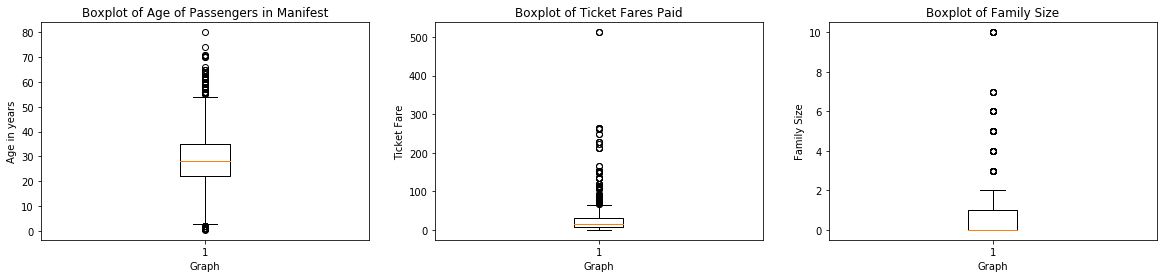

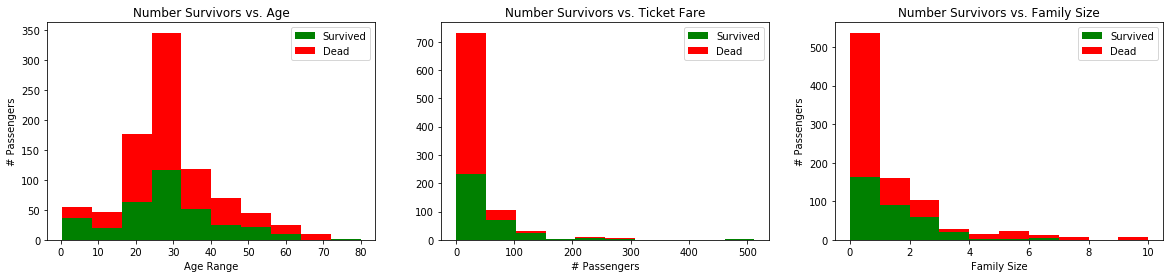

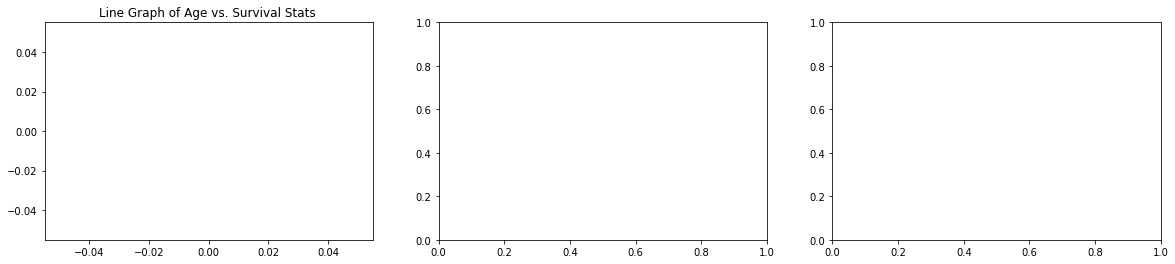

In [133]:
import re
from sklearn import preprocessing

# Use DataFrame cut() and qcut() to split samples into Bins by sample size and quartile size respectively.

def feateng1(x):
    m = re.match(r".*, (Mr.|Mrs.|Miss).*$", x)
    if m is not None:
        ret = m.group(1)
        return re.sub(r"\.$",'',ret)
    else:
        return ''

    
df = pd.read_csv('train.csv')

# Fill NULL Values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
# Fill NULL Values

df['FareBin'] = pd.qcut(df['Fare'], 4)
df['AgeBin']=pd.cut(df['Age'],4)
df.head(30)
df['Title'] = df['Name'].apply(feateng1)
df['isAlone']=np.nan
df.loc[df[(df['Parch']>0) | (df['SibSp']>0)].index,'isAlone']=0
df.loc[df[(df['Parch']==0) & (df['SibSp']==0)].index,'isAlone']=1

# If Title is a super Outlier and has only 10 occurances, then set it to 'Misc'
list_misc_titles = (df['Title'].value_counts()<10)

for misctitle in list_misc_titles:
    df.loc[df['Title']==misctitle,'Title'] = 'Misc'

df['FamilySize'] = df['Parch'] + df['SibSp']

# ENCODE Everything for Model Calculation Purposes
lb = preprocessing.LabelEncoder()
df['Sex_Code'] = lb.fit_transform(df['Sex'])
df['AgeBin_Code'] = lb.fit_transform(df['AgeBin'])
df['FareBin_Code'] = lb.fit_transform(df['FareBin'])
df['Embarked_Code'] = lb.fit_transform(df['Embarked'])
# ENCODE Everything for Model Calculation Purposes


    

# Checks for if there are any Null values in the Columns
#df.isnull().sum()
#df.info()

# Declare Array of Target Columns for Graphing
Target = ['Survived']

# Declare Array of Independant Variable Columns for Graphing
x_independant_vars = ['Pclass','Sex','AgeBin','FareBin','Embarked','Cabin','SibSp','Parch','FamilySize']
x_discrete_independant_vars=['Pclass','Sex_Code','AgeBin_Code','FareBin_Code','Embarked_Code','Cabin','SibSp','Parch','FamilySize']

# Boxplots of Dependant Variables
fig, axarr = plt.subplots(1,3, figsize=(20,4))
# 1. AGE
axarr[0].boxplot(df['Age'])
axarr[0].set_title('Boxplot of Age of Passengers in Manifest')
axarr[0].set_xlabel('Graph')
axarr[0].set_ylabel('Age in years')
# 2. Fare
axarr[1].boxplot(df['Fare'])
axarr[1].set_title('Boxplot of Ticket Fares Paid')
axarr[1].set_xlabel('Graph')
axarr[1].set_ylabel('Ticket Fare')
# 3. Family Size
axarr[2].boxplot(df['FamilySize'])
axarr[2].set_title('Boxplot of Family Size')
axarr[2].set_xlabel('Graph')
axarr[2].set_ylabel('Family Size')
# Boxplots of Dependant Variables



fig, axarr = plt.subplots(1,3, figsize=(20,4))

#df.loc[:,['AgeBin','Survived']].groupby('AgeBin').agg(np.sum).plot.bar(ax=axarr[0])
#axarr[0].set_title('Survival Stats by Age Bins')

# AGE HISTOGRAM vs. SURVIVAL
axarr[0].hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], 
              stacked=True, color = ['g','r'],label = ['Survived','Dead'])
axarr[0].set_title('Number Survivors vs. Age')
axarr[0].set_xlabel('Age Range')
axarr[0].set_ylabel('# Passengers')
axarr[0].legend()
# FARE HISTOGRAM vs. SURVIVAL
axarr[1].hist(x=[df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True,
              color=['g','r'], label=['Survived','Dead'])
axarr[1].set_title('Number Survivors vs. Ticket Fare')
axarr[1].set_xlabel('Ticket Fare')
axarr[1].set_xlabel('# Passengers')
axarr[1].legend()
# FAMILY SIZE vs. SURVIVAL
axarr[2].hist(x=[df[df['Survived']==1]['FamilySize'], df[df['Survived']==0]['FamilySize']], stacked=True,
             color=['g','r'], label=['Survived','Dead'])
axarr[2].set_title('Number Survivors vs. Family Size')
axarr[2].set_xlabel('Family Size')
axarr[2].set_ylabel('# Passengers')
axarr[2].legend()



fig, axarr = plt.subplots(1,3, figsize=(20,4))

axarr[0].plot(x=df['Age'].value_counts().index.values, height=df['Age'].value_counts().values)
axarr[0].set_title('Line Graph of Age vs. Survival Stats ')

#mask = np.where(df['Name'].str.contains('Mr.'))[0]
#df.iloc[2]
#df.iloc[[x for x in df.index if x not in intermed],].head(20)

((265, 10), (265,))

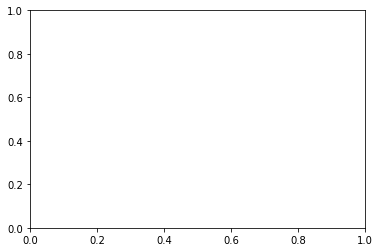

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()

x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.4, random_state=0)

lnr = linear_model.LinearRegression()
lnrmodel = lnr.fit(x_train, y_train)

fig, axesarr = plt.subplots(1,1)
x_train.shape, y_train.shape




In [1]:
x = np.array([2,4,1.5,2,3])
y = np.array([7,3,8,8,6])

stats.pearsonr(x,y)

zx = (x - x.mean())/x.std()
zy = (y-y.mean())/y.std()
s=0
for a in (zx * zy):
    s = s + a
s/4
#for i in range(zx.shape[0]):
#    s = s + (zx[i]*zy[i])


NameError: name 'np' is not defined

In [92]:
import os, re, sys

rpost = pd.DataFrame()

left_dir = 'scanner_log_newbox'

reg_case1 = r"\d{2}\/\d{2}\/\d{4}\s\d{2}:\d{2}:\d{2}-Datamart batch of feeder (\w+) processing started"
reg_case2 = r"\d{2}\/\d{2}\/\d{4}\s\d{2}:\d{2}:\d{2}-{ NPID:(\d{1,}) , SID:(\d{1,}) , Hostname:\((\w+)\) }"

for root, dirs, files in os.walk(os.path.join(left_dir)):
    for filename in files:
        with open(os.path.join(left_dir,filename),'r') as fh:
            PROCSCRIPT_name=''
            for line in fh.readlines():
                if re.search(reg_case1, line) is not None:
                    PROCSCRIPT_name = re.match(reg_case1, line).groups(1)
                elif re.search(reg_case2, line) is not None:
                    m = re.match(reg_case2, line)
                    rpost = rpost.append(pd.Series(data=[m.group(1),m.group(2),m.group(3),PROCSCRIPT_name,filename], index=['NPID','SID','HOSTNAME','PROCSCRIPT','SCANLOG']), ignore_index=True)
                    
                    #rpost.append(pd.Series({'NPID':m.groups(1), 'SID':m.groups(2), 'HOSTNAME':m.groups(3)}, name=m.groups(2)))
            print(rpost)

        HOSTNAME    NPID          PROCSCRIPT                    SCANLOG SID
0   uklpadrzr07a   97184                      scanner_client.261522.log  10
1   uklpadrzr07a   97188                      scanner_client.261522.log  11
2   uklpadrzr07a   97193                      scanner_client.261522.log  12
3   uklpadrzr08a   77529                      scanner_client.261522.log  13
4   uklpadrzr08a   77532                      scanner_client.261522.log  14
5   uklpadrzr08a   77565                      scanner_client.261522.log  15
6   uklpadrzr08a   77544                      scanner_client.261522.log  16
7   uklpadrzr11a   78448                      scanner_client.261522.log  17
8   uklpadrzr11a   78444                      scanner_client.261522.log  18
9   uklpadrzr11a   78437                      scanner_client.261522.log  19
10  uklpaurzr64a   51432                      scanner_client.261522.log  20
11  uklpaurzr64a   51454                      scanner_client.261522.log  21
12  uklpaurz

         HOSTNAME    NPID          PROCSCRIPT                    SCANLOG SID
0    uklpadrzr07a   97184                      scanner_client.261522.log  10
1    uklpadrzr07a   97188                      scanner_client.261522.log  11
2    uklpadrzr07a   97193                      scanner_client.261522.log  12
3    uklpadrzr08a   77529                      scanner_client.261522.log  13
4    uklpadrzr08a   77532                      scanner_client.261522.log  14
5    uklpadrzr08a   77565                      scanner_client.261522.log  15
6    uklpadrzr08a   77544                      scanner_client.261522.log  16
7    uklpadrzr11a   78448                      scanner_client.261522.log  17
8    uklpadrzr11a   78444                      scanner_client.261522.log  18
9    uklpadrzr11a   78437                      scanner_client.261522.log  19
10   uklpaurzr64a   51432                      scanner_client.261522.log  20
11   uklpaurzr64a   51454                      scanner_client.261522.log  21

         HOSTNAME    NPID          PROCSCRIPT                    SCANLOG SID
0    uklpadrzr07a   97184                      scanner_client.261522.log  10
1    uklpadrzr07a   97188                      scanner_client.261522.log  11
2    uklpadrzr07a   97193                      scanner_client.261522.log  12
3    uklpadrzr08a   77529                      scanner_client.261522.log  13
4    uklpadrzr08a   77532                      scanner_client.261522.log  14
5    uklpadrzr08a   77565                      scanner_client.261522.log  15
6    uklpadrzr08a   77544                      scanner_client.261522.log  16
7    uklpadrzr11a   78448                      scanner_client.261522.log  17
8    uklpadrzr11a   78444                      scanner_client.261522.log  18
9    uklpadrzr11a   78437                      scanner_client.261522.log  19
10   uklpaurzr64a   51432                      scanner_client.261522.log  20
11   uklpaurzr64a   51454                      scanner_client.261522.log  21

[276 rows x 5 columns]
